<a href="https://colab.research.google.com/github/derrickgzq/fyp/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Granger-causality for PPI and CPI in Malaysia


In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import plotly.express as px
from pmdarima.arima import auto_arima

Get data from github

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/fyp%20data.csv')

In [6]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').rename_axis('Indexes', axis=1)

EDA

In [7]:
df.head()

Indexes,PPI,CPI
date,,
2010-01-01,98.4,99.4
2010-02-01,98.4,99.4
2010-03-01,99.9,99.4
2010-04-01,99.8,99.4
2010-05-01,98.6,99.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158 entries, 2010-01-01 to 2023-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPI     158 non-null    float64
 1   CPI     158 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [9]:
df.describe()

Indexes,PPI,CPI
count,158.000000,158.000000
mean,107.968354,114.484810
std,6.045339,8.444432
min,98.400000,99.400000
25%,103.800000,106.375000
50%,107.500000,115.200000
75%,112.200000,121.100000
max,124.100000,129.800000


Visualizations

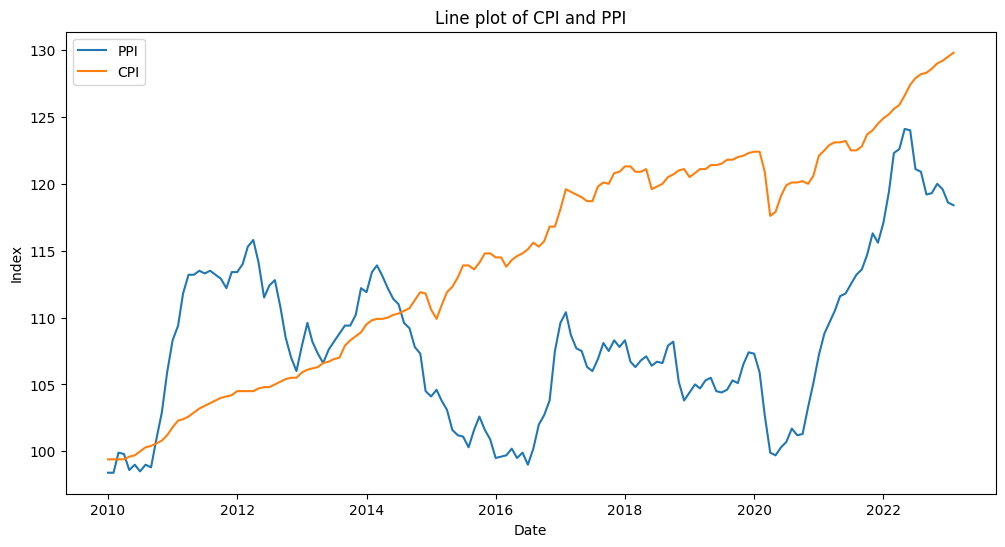

In [17]:
plt.figure(figsize = (12, 6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of CPI and PPI')
plt.legend(df)
plt.show()


Test for stationarity

In [18]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])

In [19]:
print('ADF Test: PPI time series')
adf_test(df['PPI'])
print(' ')
print('ADF Test: CPI time series')
adf_test(df['CPI'])

ADF Test: PPI time series
ADF Statistics: -2.078314
p-value: 0.253323
 
ADF Test: CPI time series
ADF Statistics: -0.446475
p-value: 0.902045


ADF tests show PPI and CPI aren't stationary

In [20]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [21]:
print('KPSS Test: PPI time series')
kpss_test(df['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.27624653438342345
p-value: 0.1
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 1.8161060327078424
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [22]:
df_diff = df.diff().dropna()

In [23]:
df_diff

Indexes,PPI,CPI
date,,
2010-02-01,0.0,0.0
2010-03-01,1.5,0.0
2010-04-01,-0.1,0.0
2010-05-01,-1.2,0.2
2010-06-01,0.4,0.1
...,...,...
2022-10-01,0.1,0.3
2022-11-01,0.7,0.4
2022-12-01,-0.4,0.2


In [24]:
fig = px.line(df_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [25]:
print('KPSS Test: PPI time series')
kpss_test(df_diff['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df_diff['CPI'])
print('ADF Test: PPI time series')
adf_test(df_diff['PPI'])
print('ADF Test: CPI time series')
adf_test(df_diff['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.100521385330511
p-value: 0.1
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 0.06243919387668234
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
ADF Test: PPI time series
ADF Statistics: -7.739012
p-value: 0.000000
ADF Test: CPI time series
ADF Statistics: -9.314616
p-value: 0.000000


<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ARIMA model

In [ ]:
#CPI
cpi = auto_arima(df_diff[['CPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(cpi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -104.700
Date:                Sat, 21 Oct 2023   AIC                            215.399
Time:                        08:15:51   BIC                            224.568
Sample:                    02-01-2010   HQIC                           219.123
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1933      0.064      3.034      0.002       0.068       0.318
ma.L1          0.4342      0.047      9.244      0.000       0.342       0.526
sigma2         0.2219      0.013     16.655      0.0

In [ ]:
#PPI
ppi = auto_arima(df_diff[['PPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(ppi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -239.466
Date:                Sat, 21 Oct 2023   AIC                            482.931
Time:                        08:13:57   BIC                            489.044
Sample:                    02-01-2010   HQIC                           485.414
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4429      0.074      5.995      0.000       0.298       0.588
sigma2         1.2352      0.138      8.981      0.000       0.966       1.505
Ljung-Box (L1) (Q):                   0.01   Jarque-

VAR model

In [ ]:
model = VAR(df_diff)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -1.2944247284495671
BIC :  -1.177122574324585
FPE :  0.2740580746659341 

Lag Order = 2
AIC :  -1.317153604811145
BIC :  -1.120803597267968
FPE :  0.2679087556056135 

Lag Order = 3
AIC :  -1.2777617353219775
BIC :  -1.0016751351025566
FPE :  0.2786952576158017 

Lag Order = 4
AIC :  -1.2410368869562163
BIC :  -0.8845147785571063
FPE :  0.2891629429580904 

Lag Order = 5
AIC :  -1.2031761072785936
BIC :  -0.7655091897876852
FPE :  0.3003913451381323 

Lag Order = 6
AIC :  -1.1510884193606308
BIC :  -0.6315567918295842
FPE :  0.3165627499532075 

Lag Order = 7
AIC :  -1.10044194898112
BIC :  -0.4983148901618688
FPE :  0.33317061659846386 

Lag Order = 8
AIC :  -1.0521779628189551
BIC :  -0.3667137050864344
FPE :  0.3498740416733018 

Lag Order = 9
AIC :  -1.0272313492622855
BIC :  -0.25767684653906686
FPE :  0.3590182533983652 

Lag Order = 10
AIC :  -0.980845092858462
BIC :  -0.12643578235025155
FPE :  0.3764727846867343 

Lag Order = 11
AIC :  -0.9645381886008998


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Compare between ARIMA dan VAR, VAR model is way better, in terms of AIC and BIC already, so we will proceed with VAR.

Lag order 2 is chose because lowest AIC and FPE

In [ ]:
results = model.fit(maxlags = 2, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 21, Oct, 2023
Time:                     08:16:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.12080
Nobs:                     155.000    HQIC:                  -1.23740
Log likelihood:          -327.792    FPE:                   0.267909
AIC:                     -1.31715    Det(Omega_mle):        0.251426
--------------------------------------------------------------------
Results for equation PPI
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.090893         0.100412            0.905           0.365
L1.PPI         0.458190         0.082609            5.546           0.000
L1.CPI        -0.097585         0.199082           -0.490           0.624
L2.PPI        -0

Check whether is PPI a predictive of CPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['CPI', 'PPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=2.0862  , p=0.1486  , df=1
likelihood ratio test: chi2=2.0725  , p=0.1500  , df=1
parameter F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=16.3269 , p=0.0003  , df=2
likelihood ratio test: chi2=15.5278 , p=0.0004  , df=2
parameter F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=19.3320 , p=0.0002  , df=3
likelihood ratio test: chi2=18.2181 , p=0.0004  , df=3
parameter F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3


Check whether CPI is a predictive of PPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['PPI', 'CPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=0.0306  , p=0.8612  , df=1
likelihood ratio test: chi2=0.0306  , p=0.8612  , df=1
parameter F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=0.1806  , p=0.9136  , df=2
likelihood ratio test: chi2=0.1805  , p=0.9137  , df=2
parameter F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=0.2375  , p=0.9713  , df=3
likelihood ratio test: chi2=0.2373  , p=0.9714  , df=3
parameter F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3


Granger-Causality matrix

In [ ]:
maxlag = 2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_diff, variables = df_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results



,PPI_x,CPI_x
PPI_y,1.0000,0.489
CPI_y,0.0001,1.000


Lets compare in terms of the state with highest and lowest GDP (Selangor and Perlis)

In [53]:
df_state = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/data%20of%20states%20cpi_completed.csv')

In [54]:
df_state = df_state[['Date', 'Selangor', 'Perlis','PPI']]

In [55]:
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_state = df_state.set_index('Date').rename_axis('Indexes', axis=1)

In [56]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2021-01-01 to 2023-08-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Selangor  32 non-null     float64
 1   Perlis    32 non-null     float64
 2   PPI       32 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [57]:
df_state.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


In [59]:
dfs = df_state

In [60]:
dfs.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


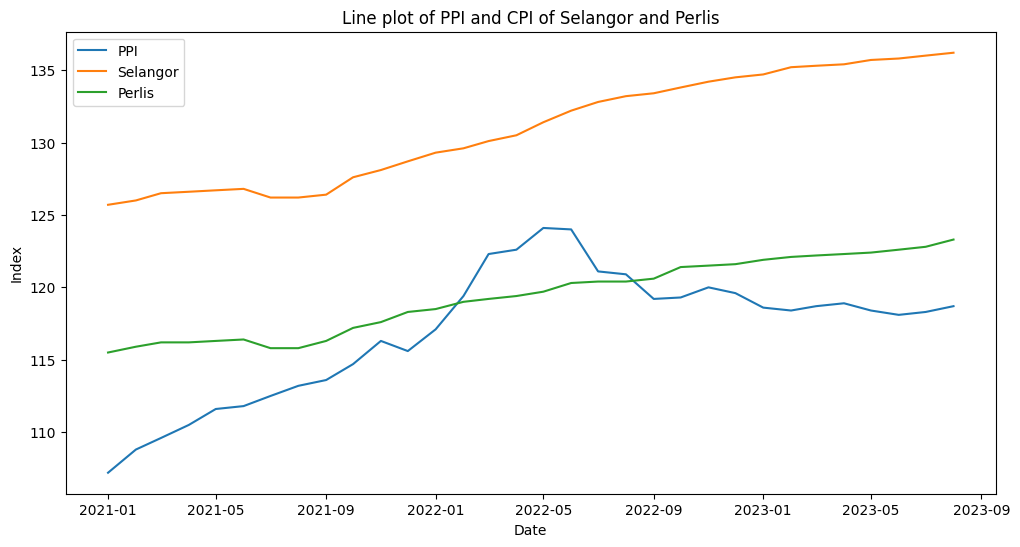

In [63]:
plt.figure(figsize = (12, 6))
plt.plot(dfs[['PPI','Selangor','Perlis']])
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of PPI and CPI of Selangor and Perlis')
plt.legend(dfs[['PPI','Selangor','Perlis']])
plt.show()

In [64]:
dfs_diff = dfs.diff().dropna()

In [72]:
fig = px.line(dfs_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [65]:
for i in dfs_diff.columns:
  print('ADF test for ',i)
  adf_test(dfs_diff[i])
  print('KPSS test for ',i)
  kpss_test(dfs_diff[i])
  print(' ')

ADF test for  Selangor
ADF Statistics: -2.146921
p-value: 0.226070
KPSS test for  Selangor
KPSS Statistic: 0.13525002827594113
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Perlis
ADF Statistics: -4.068523
p-value: 0.001091
KPSS test for  Perlis
KPSS Statistic: 0.08041330053392216
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  PPI
ADF Statistics: -3.777777
p-value: 0.003143
KPSS test for  PPI
KPSS Statistic: 0.426668152037163
p-value: 0.0656602792943263
num lags: 2
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 


<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-20-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [70]:
model = VAR(dfs_diff)
for i in [1,2,3,4,5,6]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -5.0834892328351575
BIC :  -4.523010280170295
FPE :  0.006228017139225892 

Lag Order = 2
AIC :  -4.772233124406894
BIC :  -3.7821223509684123
FPE :  0.008711776646079507 

Lag Order = 3
AIC :  -4.56305700716301
BIC :  -3.1356950319752914
FPE :  0.011513086379612819 

Lag Order = 4
AIC :  -4.217318326248227
BIC :  -2.345553964241974
FPE :  0.019125345355262325 

Lag Order = 5
AIC :  -5.128352736893889
BIC :  -2.8057129743926916
FPE :  0.010939153590226649 

Lag Order = 6
AIC :  -10.226878872627395
BIC :  -7.447841991927899
FPE :  0.00014929469619115896 



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Lag order 1 is the best, with lowest AIC, BIC and FPE

In [71]:
maxlag = 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfs_diff, variables = dfs_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1

,Selangor_x,Perlis_x,PPI_x
Selangor_y,1.000,0.0346,0.0118
Perlis_y,0.014,1.0000,0.1074
PPI_y,0.000,0.2939,1.0000
